In [27]:
COLOR1 = '#6495ED'
COLOR2 = '#FF7518'

In [28]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

pickle_file = 'results_and_resampled_data.pickle'

if not os.path.exists('plots'):
    os.makedirs('plots')

with open(pickle_file, 'rb') as f:
    data = pickle.load(f)

# Open data/participants.csv
participant_start = {}
with open('data/participants.csv', 'r') as f:
    plines = f.readlines()
assert plines[0].strip().replace(' ','') == 'Participant,Startedwith', 'First line of participants.csv must be "Participant,Start"'

for line in plines[1:]:
    participant, startedwith = line.strip().split(',')
    participant = participant.strip()
    assert participant in data.keys(), 'Participant {} not found in data'.format(participant)

    startedwith = startedwith.strip()
    assert startedwith in ['2D', '3D'], 'Startedwith must be either 2D or 3D'
    participant_start[participant] = startedwith


In [29]:
# data['ID1']['Percussions (ID1)']['Recording Trajectory X / ControlGris']['2D']

In [30]:
if not os.path.exists('plots'):
    os.makedirs('plots')

if not os.path.exists('plots/qom'):
    os.makedirs('plots/qom')

In [31]:
DEFAULT_MATPLOTLIB_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [32]:
ALLTRACKS = ['Percussions (ID1)','Xylophone (ID3)', 'Texture (ID5)', 'Brass (ID7)', 'Voice (ID9)']
all_2D_QoMs_pertrack = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack = {track:[] for track in ALLTRACKS}


all_2D_QoMs_pertrack_startedwith2D = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack_startedwith2D = {track:[] for track in ALLTRACKS}

all_2D_QoMs_pertrack_startedwith3D = {track:[] for track in ALLTRACKS}
all_3D_QoMs_pertrack_startedwith3D = {track:[] for track in ALLTRACKS}

assert len(data.keys()) == 12, 'There should be 12 participants'

for pidx,participant in enumerate(data.keys()):
    assert all([track in data[participant].keys() for track in ALLTRACKS]), 'Participant {} is missing some tracks'.format(participant)
    assert len (data[participant].keys()) == 5+1, 'Participant {} has more than 5 tracks and 1 averages'.format(participant)

    fig, ax = plt.subplots(1, 1)
    ax.set_title('Participant {}'.format(participant))
    ax.set_xlabel('Tracks')
    ax.set_ylabel('Quantity of Motion')

    bar_width = 0.35



    for tidx,track in enumerate(ALLTRACKS):

        # print('track', track)
        xpos2D = tidx - bar_width/2
        xpos3D = tidx + bar_width/2

        # print('data[participant][track][2D].keys()', data[participant][track]['2D'].keys())
        _2dQoM = data[participant][track]['2D']['QoM']
        _3dQoM = data[participant][track]['3D_DTW']['QoM']

        all_2D_QoMs_pertrack[track].append(_2dQoM)
        all_3D_QoMs_pertrack[track].append(_3dQoM)

        if participant_start[participant] == '2D':
            all_2D_QoMs_pertrack_startedwith2D[track].append(_2dQoM)
            all_3D_QoMs_pertrack_startedwith2D[track].append(_3dQoM)
        elif participant_start[participant] == '3D':
            all_2D_QoMs_pertrack_startedwith3D[track].append(_2dQoM)
            all_3D_QoMs_pertrack_startedwith3D[track].append(_3dQoM)
        else:
            raise ValueError('Participant {} has invalid startedwith {}'.format(participant, participant_start[participant]))

        # print('2D Quantity of Motion', _2dQoM)
        # print('3D Quantity of Motion', _3dQoM)

        ax.bar(xpos2D, _2dQoM, bar_width, label='DAW (2D)', color=DEFAULT_MATPLOTLIB_COLORS[2], edgecolor='k')
        ax.bar(xpos3D, _3dQoM, bar_width, label='VR (3D)', color=DEFAULT_MATPLOTLIB_COLORS[4], edgecolor='k')

        ax.set_ylim(0, 45)


    # Collapse legend not to include all repeated labels
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    
    # Remove IDX from track names
    tracknames = [track[:-6] for track in ALLTRACKS]
    plt.xticks(range(len(tracknames)), tracknames)




    # plt.savefig('plots/qom/quom{}.pdf'.format(participant), bbox_inches='tight')
    plt.savefig('plots/qom/quom{}.png'.format(participant), bbox_inches='tight')
    plt.close()

assert len(all_2D_QoMs_pertrack.keys()) == len(all_3D_QoMs_pertrack.keys()) == 5, 'There should be 5 tracks, found {} & {}'.format(len(all_2D_QoMs_pertrack.keys()),len(all_3D_QoMs_pertrack.keys()))
for track in all_2D_QoMs_pertrack.keys():
    assert len(all_2D_QoMs_pertrack[track]) == len(all_3D_QoMs_pertrack[track]) == 12, 'There should be 12 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack[track]),len(all_3D_QoMs_pertrack[track]))

for track in all_2D_QoMs_pertrack_startedwith2D.keys():
    assert len(all_2D_QoMs_pertrack_startedwith2D[track]) == len(all_3D_QoMs_pertrack_startedwith2D[track]) == 6, 'There should be 6 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack_startedwith2D[track]),len(all_3D_QoMs_pertrack_startedwith2D[track]))
    assert len(all_2D_QoMs_pertrack_startedwith3D[track]) == len(all_3D_QoMs_pertrack_startedwith3D[track]) == 6, 'There should be 6 participants, found {} & {}'.format(len(all_2D_QoMs_pertrack_startedwith3D[track]),len(all_3D_QoMs_pertrack_startedwith3D[track]))

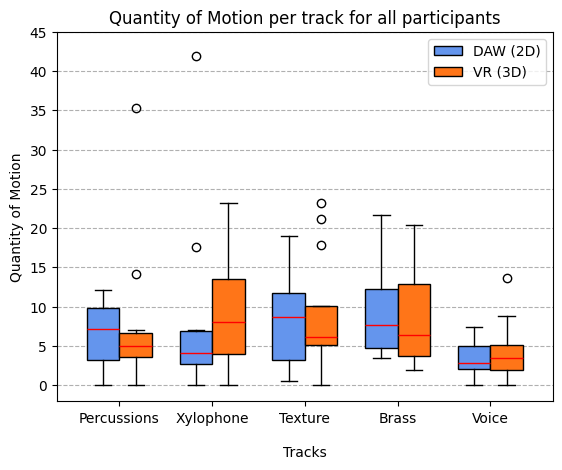

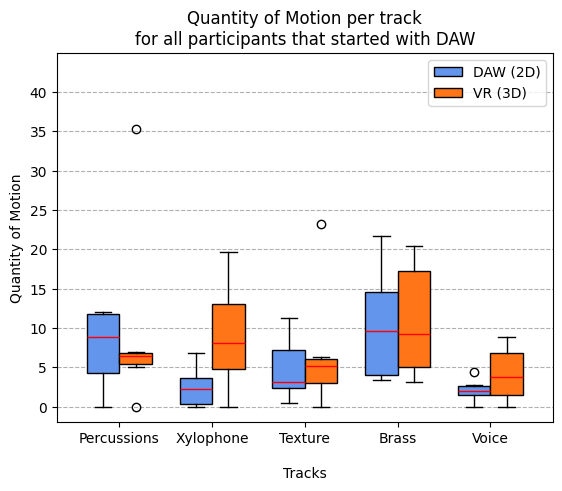

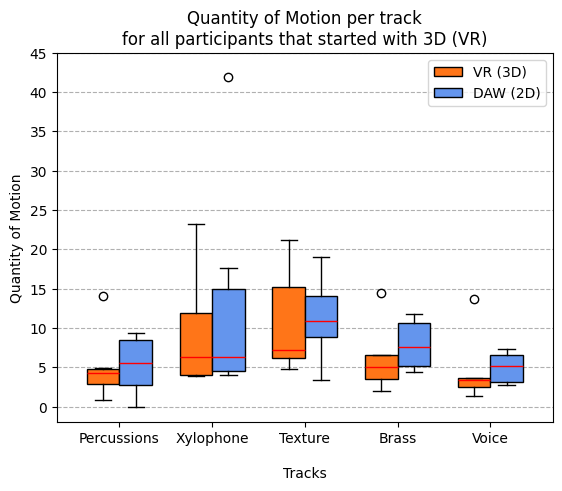

In [33]:
# now plot maxQoM for 2D and 3D as boxplots

# def setboxcolor(bp, color):
#     color = COLOR2
#     for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#             plt.setp(bp[item], color=color)
#     # plt.setp(bp["boxes"], facecolor=color)
#     plt.setp(bp["fliers"], markeredgecolor=color)


def boxplot_QoM(data1, data2, label1, label2, reverse = False, color1=COLOR1, color2=COLOR2):
    # color1 = COLOR1
    # color2 = COLOR2

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('Tracks',labelpad=15)
    ax.set_ylabel('Quantity of Motion')

    def plot1():
        if reverse:
            poss = np.arange(len(ALLTRACKS))+bar_width/2
        else:
            poss = np.arange(len(ALLTRACKS))-bar_width/2
        box1 = ax.boxplot([data1[track] for track in ALLTRACKS], positions=poss, widths=bar_width, label=label1, patch_artist=True)
        # for element in ['boxes', 'whiskers', 'caps', 'medians']:
        #     plt.setp(box1[element], color=color1)  # Set all elements to red
        for patch in box1['boxes']:
            patch.set(facecolor=color1)  # Fill the boxes with red
        return box1

    def plot2():
        if reverse:
            poss = np.arange(len(ALLTRACKS))-bar_width/2
        else:
            poss = np.arange(len(ALLTRACKS))+bar_width/2
        box2 = ax.boxplot([data2[track] for track in ALLTRACKS], positions=poss, widths=bar_width, label=label2, patch_artist=True)
        # for element in ['boxes', 'whiskers', 'caps', 'medians']:
        #     plt.setp(box2[element], color=color2)  # Set all elements to purple
        for patch in box2['boxes']:
            patch.set(facecolor=color2)  # Fill the boxes with purple
        return box2
    
    if not reverse:
        box1 = plot1()
        box2 = plot2()
    else:
        box2 = plot2()
        box1 = plot1()


    for element in ['medians']:
        plt.setp(box1[element], color='red')  # Set all elements to red
        plt.setp(box2[element], color='red')  # Set all elements to red

    plt.xticks(range(len(ALLTRACKS)), [track[:-6] for track in ALLTRACKS])

    datamax = max([max(data1[track]+data2[track]) for track in ALLTRACKS])
    plotmax = np.ceil(datamax/5)*5
    ax.set_yticks(np.arange(0, plotmax+1, 5))
    ax.grid(axis='y', zorder=0, linestyle='--')


    ax.legend()

    return fig, ax

fig, ax = boxplot_QoM(all_2D_QoMs_pertrack, all_3D_QoMs_pertrack, label1='DAW (2D)', label2='VR (3D)')
ax.set_title('Quantity of Motion per track for all participants')
plt.savefig('plots/qom/qom_allparticipants.pdf', bbox_inches='tight')
plt.show()


fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith2D, all_3D_QoMs_pertrack_startedwith2D, label1='DAW (2D)', label2='VR (3D)')
ax.set_title('Quantity of Motion per track\nfor all participants that started with DAW')
plt.savefig('plots/qom/qom_startedwith2D.pdf', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()

fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith3D, all_3D_QoMs_pertrack_startedwith3D, label1='DAW (2D)', label2='VR (3D)', reverse=True)
ax.set_title('Quantity of Motion per track\nfor all participants that started with 3D (VR)')
plt.savefig('plots/qom/qom_startedwith3D.pdf', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()


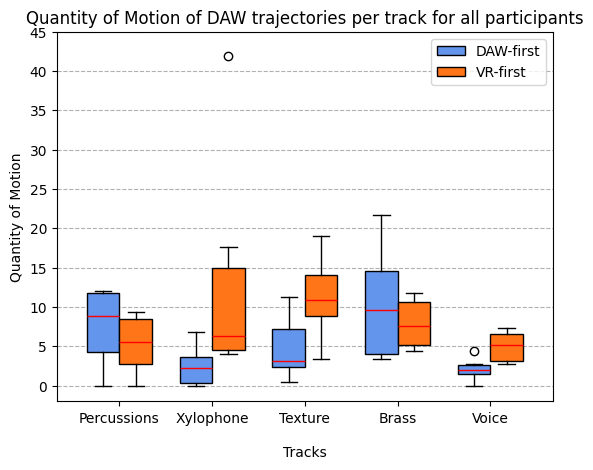

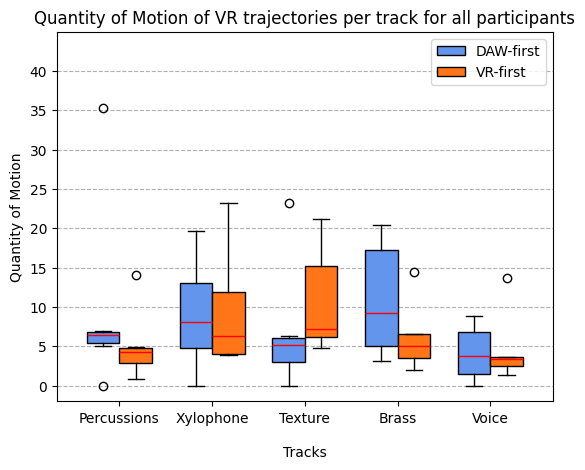

In [34]:
fig, ax = boxplot_QoM(all_2D_QoMs_pertrack_startedwith2D, all_2D_QoMs_pertrack_startedwith3D, label1='DAW-first', label2='VR-first', color1=COLOR1, color2=COLOR2)
ax.set_title(r'Quantity of Motion of DAW trajectories per track for all participants')
plt.savefig('plots/qom/qom_2D_bystarted.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_2D_bystarted.png', bbox_inches='tight')

ax.set_ylim(-2, 45)
plt.show()

fig, ax = boxplot_QoM(all_3D_QoMs_pertrack_startedwith2D, all_3D_QoMs_pertrack_startedwith3D, label1='DAW-first', label2='VR-first', color1=COLOR1, color2=COLOR2)
ax.set_title(r'Quantity of Motion of VR trajectories per track for all participants')
plt.savefig('plots/qom/qom_3D_bystarted.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_3D_bystarted.png', bbox_inches='tight')
ax.set_ylim(-2, 45)
plt.show()

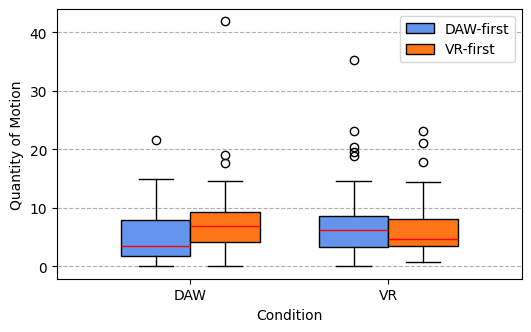

In [44]:

color1 = COLOR1
color2 = COLOR2

put_all_tracks_togethter = lambda data: np.array([data[track] for track in data.keys()]).flatten()
all2d_2dfirst = put_all_tracks_togethter(all_2D_QoMs_pertrack_startedwith2D)
assert len(all2d_2dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all2d_2dfirst))
all3d_2dfirst = put_all_tracks_togethter(all_3D_QoMs_pertrack_startedwith2D)
assert len(all3d_2dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all3d_2dfirst))

all2d_3dfirst = put_all_tracks_togethter(all_2D_QoMs_pertrack_startedwith3D)
assert len(all2d_3dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all2d_3dfirst))
all3d_3dfirst = put_all_tracks_togethter(all_3D_QoMs_pertrack_startedwith3D)
assert len(all3d_3dfirst) == 5*6, 'Expected 5*6=30, got {}'.format(len(all3d_3dfirst))

processed_2Dfirst_bytype = [all2d_2dfirst, all3d_2dfirst]
label1 = 'DAW-first'

processed_3Dfirst_bytype = [all2d_3dfirst, all3d_3dfirst]
label2 = 'VR-first'


fig, ax = plt.subplots(figsize=(5, 3.5))
ax.set_xlabel('Condition')
ax.set_ylabel('Quantity of Motion')

poss = np.arange(len(processed_2Dfirst_bytype))-bar_width/2
box1 = ax.boxplot(processed_2Dfirst_bytype, positions=poss, widths=bar_width, label=label1, patch_artist=True, zorder=100)
# for element in ['boxes', 'whiskers', 'caps', 'medians']:
#     plt.setp(box1[element], color=color1)  # Set all elements to red
for patch in box1['boxes']:
    patch.set(facecolor=color1)  # Fill the boxes with red

poss = np.arange(len(processed_3Dfirst_bytype))+bar_width/2
box2 = ax.boxplot(processed_3Dfirst_bytype, positions=poss, widths=bar_width, label=label2, patch_artist=True, zorder=100)
# for element in ['boxes', 'whiskers', 'caps', 'medians']:
#     plt.setp(box2[element], color=color2)  # Set all elements to purple
for patch in box2['boxes']:
    patch.set(facecolor=color2)  # Fill the boxes with purple

#yticks every 5
datamax = max(np.max(processed_2Dfirst_bytype),np.max(processed_3Dfirst_bytype))
# set plotmax to next multiple of 5
plotmax = np.ceil(datamax/5)*5
ax.set_yticks(np.arange(0, plotmax+1, 10))

#grid
ax.grid(axis='y', zorder=0, linestyle='--')


for element in ['medians']:
    plt.setp(box1[element], color='red')  # Set all elements to red
    plt.setp(box2[element], color='red')  # Set all elements to red

plt.xticks(range(2), ['DAW', 'VR'])

ax.legend()

plt.savefig('plots/qom/qom_bytype.pdf', bbox_inches='tight')
plt.savefig('plots/qom/qom_bytype.png', bbox_inches='tight')
plt.show()


In [36]:
# processed_2Dfirst_bytype
# The column labels for this are: DAW(2D)-DAWfirst, VR(3D)_DAWfirst
# 
# processed_3Dfirst_bytype
# The column labels for this are: DAW(2D)-VRfirst, VR(3D)-VRfirst

import pandas as pd
df = pd.DataFrame({'Condition_2D-Started_2D':processed_2Dfirst_bytype[0], 
                   'Condition_3D-Started_2D':processed_2Dfirst_bytype[1], 
                   'Condition_2D-Started_3D':processed_3Dfirst_bytype[0], 
                   'Condition_3D-Started_3D':processed_3Dfirst_bytype[1]})

if not os.path.exists('res'):
    os.makedirs('res')
df.to_csv('res/qom_bytype.csv', index=False)


In [37]:
# del full_QoM_dataframe
full_QoM_dataframe = pd.DataFrame(columns=['Participant', 'Condition', 'startedwith', 'Track', 'QoM', 'X', 'Y', 'Z'])

for pidx,participant in enumerate(data.keys()):
    for tidx,track in enumerate(ALLTRACKS):
        for cidx,condition in enumerate(['2D', '3D_DTW']):
            print('p[%d/%d]'%(pidx+1, len(data.keys())), 't[%d/%d]'%(tidx+1, len(ALLTRACKS)), 'c%s'%(condition.replace('_DTW','')))

            QoM = data[participant][track][condition]['QoM']
            X = data[participant][track]['Recording Trajectory X / ControlGris'][condition]
            Y = data[participant][track]['Recording Trajectory Y / ControlGris'][condition]
            Z = data[participant][track]['Recording Trajectory Z / ControlGris'][condition]

            X = str(['%.6f' % elem for elem in X])
            Y = str(['%.6f' % elem for elem in Y])
            Z = str(['%.6f' % elem for elem in Z])

            
        # df_maes = pd.concat([df_maes, pd.DataFrame([newrow])], ignore_index=True)

            full_QoM_dataframe = pd.concat([full_QoM_dataframe, 
                                            pd.DataFrame([{'Participant':participant, 
                                                          'startedwith':participant_start[participant]+'-first', 
                                                          'Condition':'%s'%(condition.replace('_DTW','')), 
                                                          'Track':track, 
                                                          'QoM':QoM, 
                                                          'X':X,
                                                          'Y':Y,
                                                          'Z':Z}])],
                                                          ignore_index=True)
            
# display(full_QoM_dataframe)


byparticipant_qom_dataframe = full_QoM_dataframe.copy()
byparticipant_qom_dataframe.drop(columns=['X','Y','Z'], inplace=True)

# Export to CSV
byparticipant_qom_dataframe.to_csv('res/qoms_byparticipant.csv', index=False)
print('Exported to ./res/qoms_byparticipant.csv')

display(byparticipant_qom_dataframe)

p[1/12] t[1/5] c2D
p[1/12] t[1/5] c3D
p[1/12] t[2/5] c2D
p[1/12] t[2/5] c3D
p[1/12] t[3/5] c2D
p[1/12] t[3/5] c3D
p[1/12] t[4/5] c2D
p[1/12] t[4/5] c3D
p[1/12] t[5/5] c2D
p[1/12] t[5/5] c3D
p[2/12] t[1/5] c2D
p[2/12] t[1/5] c3D
p[2/12] t[2/5] c2D
p[2/12] t[2/5] c3D
p[2/12] t[3/5] c2D
p[2/12] t[3/5] c3D
p[2/12] t[4/5] c2D
p[2/12] t[4/5] c3D
p[2/12] t[5/5] c2D
p[2/12] t[5/5] c3D
p[3/12] t[1/5] c2D
p[3/12] t[1/5] c3D
p[3/12] t[2/5] c2D
p[3/12] t[2/5] c3D
p[3/12] t[3/5] c2D
p[3/12] t[3/5] c3D
p[3/12] t[4/5] c2D
p[3/12] t[4/5] c3D
p[3/12] t[5/5] c2D
p[3/12] t[5/5] c3D
p[4/12] t[1/5] c2D
p[4/12] t[1/5] c3D
p[4/12] t[2/5] c2D
p[4/12] t[2/5] c3D
p[4/12] t[3/5] c2D
p[4/12] t[3/5] c3D
p[4/12] t[4/5] c2D
p[4/12] t[4/5] c3D
p[4/12] t[5/5] c2D
p[4/12] t[5/5] c3D
p[5/12] t[1/5] c2D
p[5/12] t[1/5] c3D
p[5/12] t[2/5] c2D
p[5/12] t[2/5] c3D
p[5/12] t[3/5] c2D
p[5/12] t[3/5] c3D
p[5/12] t[4/5] c2D
p[5/12] t[4/5] c3D
p[5/12] t[5/5] c2D
p[5/12] t[5/5] c3D
p[6/12] t[1/5] c2D
p[6/12] t[1/5] c3D
p[6/12] t[2/

C:\Users\cimil\AppData\Local\Temp\ipykernel_6368\1633149728.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_QoM_dataframe = pd.concat([full_QoM_dataframe,


p[11/12] t[1/5] c3D
p[11/12] t[2/5] c2D
p[11/12] t[2/5] c3D
p[11/12] t[3/5] c2D
p[11/12] t[3/5] c3D
p[11/12] t[4/5] c2D
p[11/12] t[4/5] c3D
p[11/12] t[5/5] c2D
p[11/12] t[5/5] c3D
p[12/12] t[1/5] c2D
p[12/12] t[1/5] c3D
p[12/12] t[2/5] c2D
p[12/12] t[2/5] c3D
p[12/12] t[3/5] c2D
p[12/12] t[3/5] c3D
p[12/12] t[4/5] c2D
p[12/12] t[4/5] c3D
p[12/12] t[5/5] c2D
p[12/12] t[5/5] c3D
Exported to ./res/qoms_byparticipant.csv


,Participant,Condition,startedwith,Track,QoM
0,ID1,2D,3D-first,Percussions (ID1),8.676895
1,ID1,3D,3D-first,Percussions (ID1),4.685140
2,ID1,2D,3D-first,Xylophone (ID3),4.185003
3,ID1,3D,3D-first,Xylophone (ID3),3.851843
4,ID1,2D,3D-first,Texture (ID5),12.745616
...,...,...,...,...,...
115,ID12,3D,2D-first,Texture (ID5),2.349430
116,ID12,2D,2D-first,Brass (ID7),5.685441
117,ID12,3D,2D-first,Brass (ID7),6.354210
118,ID12,2D,2D-first,Voice (ID9),4.468101


In [38]:
# Now take byparticipant_qom_dataframe, group by participant and track, and put the QoM values for condition 2D and put them in a new column
# QoM_2D, and the QoM values for condition 3D and put them in a new column QoM_3D

byparticipant_mergeqom = byparticipant_qom_dataframe.copy()

byparticipant_mergeqom['QoM_2D'] = byparticipant_mergeqom.apply(lambda row: row['QoM'] if row['Condition'] == '2D' else np.nan, axis=1)
assert len(list(byparticipant_mergeqom['QoM_2D'].dropna().reset_index(drop=True))) > 0, 'No QoM values for 3D found'
byparticipant_mergeqom['QoM_3D'] = byparticipant_mergeqom.apply(lambda row: row['QoM'] if row['Condition'] == '3D' else np.nan, axis=1)
assert len(list(byparticipant_mergeqom['QoM_3D'].dropna().reset_index(drop=True))) > 0, 'No QoM values for 3D found'

byparticipant_mergeqom.drop(columns=['QoM', 'Condition'], inplace=True)
#Replace None with NaN
byparticipant_mergeqom.fillna(value=np.nan, inplace=True)
# Group by participant, startedwith, track and, when merging the QoM values, take the first non-null value
byparticipant_mergeqom = byparticipant_mergeqom.groupby(['Participant', 'startedwith', 'Track']).agg({'QoM_2D':'first', 'QoM_3D':'first'}).reset_index()


# Sort with participant by removing the "ID" characters and converting to integer
byparticipant_mergeqom['Participant'] = byparticipant_mergeqom['Participant'].apply(lambda x: int(x.replace('ID','')))
byparticipant_mergeqom.sort_values(by='Participant', inplace=True)
byparticipant_mergeqom['Participant'] = byparticipant_mergeqom['Participant'].apply(lambda x: 'ID%d'%x)
display(byparticipant_mergeqom)
#Save as csv
byparticipant_mergeqom.to_csv('res/qoms_byparticipant_merged.csv', index=False)

,Participant,startedwith,Track,QoM_2D,QoM_3D
0,ID1,3D-first,Brass (ID7),6.050005,3.704322
1,ID1,3D-first,Percussions (ID1),8.676895,4.685140
2,ID1,3D-first,Texture (ID5),12.745616,4.823356
3,ID1,3D-first,Voice (ID9),7.355678,3.326784
4,ID1,3D-first,Xylophone (ID3),4.185003,3.851843
21,ID2,2D-first,Percussions (ID1),6.649451,6.969363
22,ID2,2D-first,Texture (ID5),11.328130,6.263304
23,ID2,2D-first,Voice (ID9),0.000000,0.010755
20,ID2,2D-first,Brass (ID7),14.929196,12.257490
24,ID2,2D-first,Xylophone (ID3),6.854290,14.624574


In [39]:
# display(byparticipant_mergeqom['QoM_2D']) but skip NaNs
# display(byparticipant_mergeqom['QoM_2D'].dropna())
len(list(byparticipant_mergeqom['QoM_3D'].dropna().reset_index(drop=True)))

60